In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
volcano_data = load_dataset("easytpp/volcano")
taobao_data = load_dataset("easytpp/taobao")
retweet_data = load_dataset("easytpp/retweet")
stackoverflow_data = load_dataset("easytpp/stackoverflow")
taxi_data = load_dataset("easytpp/taxi")
amazon_data = load_dataset("easytpp/amazon")
earthquake_data = load_dataset("easytpp/earthquake")

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/513k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/39.2M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/3.88M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/3.93M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/963k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/990k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1401 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/401 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/401 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/327k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/654k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/3.72M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6454 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/922 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1851 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/2.38M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/319k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/715k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/900 [00:00<?, ? examples/s]

In [41]:
volcano_data["train"][0]

{'dim_process': 1,
 'seq_idx': 0,
 'seq_len': 5,
 'time_since_last_event': [0.0,
  1.2096000000019551,
  49.85280000000057,
  20.822399999997288,
  1439.7695999999996],
 'time_since_start': [0.0,
  1.2096000000019551,
  51.062400000002526,
  71.88479999999981,
  1511.6543999999994],
 'type_event': [0, 0, 0, 0, 0]}

In [3]:
def print_stats(dataset, split="test"):
    dataset = dataset[split]
    stats = {
        "num_sequences": len(dataset),
        "max_sequence_length": 0,
        "min_sequence_length": 1000000,
        "max_event_time": 0,
        "min_event_time": 1000000,
    }
    seq_lengths = [len(seq["time_since_last_event"]) for seq in dataset]
    times_since_last_event = [time for seq in dataset for time in seq["time_since_last_event"]]
    min_delta_event_time = min(times_since_last_event)
    max_delta_event_time = max(times_since_last_event)
    min_seq_length = min(seq_lengths)
    max_seq_length = max(seq_lengths)
    avg_seq_length = sum(seq_lengths) / len(seq_lengths)
    avg_delta_event_time = sum(times_since_last_event) / len(times_since_last_event)
    stats["max_sequence_length"] = max_seq_length
    stats["min_sequence_length"] = min_seq_length
    stats["num_sequences"] = len(seq_lengths)
    stats["avg_sequence_length"] = avg_seq_length
    stats["max_event_time"] = max_delta_event_time
    stats["min_event_time"] = min_delta_event_time
    stats["avg_event_time"] = avg_delta_event_time

    pprint(stats)

In [4]:
def plot_stats(dataset, splits=["train", "validation", "test"]):
    # Extract the data for each split
    split_data = {split: dataset[split] for split in splits}

    # Create subplots
    fig, axes = plt.subplots(len(splits) + 1, 2, figsize=(20, 7 * len(splits)))

    for i, split in enumerate(splits):
        data = split_data[split]
        seq_len = data["seq_len"]
        time_since_last_event = data["time_since_last_event"]

        # Histogram of the seq_len
        axes[i, 0].hist(seq_len, bins=20, edgecolor="k")
        axes[i, 0].set_title(f"Histogram of Sequence Length ({split})")
        axes[i, 0].set_xlabel("Sequence Length")
        axes[i, 0].set_ylabel("Frequency")

        # Histogram of the time_since_last_event
        axes[i, 1].hist(time_since_last_event, bins=20, edgecolor="k")
        axes[i, 1].set_title(f"Histogram of Time Since Last Event ({split})")
        axes[i, 1].set_xlabel("Time Since Last Event")
        axes[i, 1].set_ylabel("Frequency")
        # axes[i, 0].set_xscale('log')

        # axes[i, 0].set_yscale('log')
        # axes[i, 1].set_xscale('log')
        axes[i, 1].set_yscale("log")

    plt.tight_layout()
    plt.show()

In [5]:
def plot_stats_per_event_type(dataset, splits=["train", "validation", "test"]):
    # Extract the data for each split
    split_data = {split: dataset[split] for split in splits}

    # Create subplots
    num_events = dataset["train"][0]["dim_process"]
    fig, axes = plt.subplots(len(splits) * num_events, 2, figsize=(20, 5 * len(splits) * num_events))

    for i, split in enumerate(splits):
        data = split_data[split]

        for event_type in range(num_events):
            print(f"Event Type {event_type} for split {split}")
            event_mask = [[d == event_type for d in x["type_event"]] for x in data]
            time_since_last_event = [[e for e, m in zip(d["time_since_last_event"], e_m) if m] for d, e_m in zip(data, event_mask)]
            seq_len = [len(x) for x in time_since_last_event]
            # Histogram of the seq_len
            axes[i * num_events + event_type, 0].hist(seq_len, bins=20, edgecolor="k", alpha=0.5, label=f"Event Type {event_type}")
            axes[i * num_events + event_type, 0].set_title(f"Histogram of Sequence Length ({split})")
            axes[i * num_events + event_type, 0].set_xlabel("Sequence Length")
            axes[i * num_events + event_type, 0].set_ylabel("Frequency")

            # Histogram of the time_since_last_event
            axes[i * num_events + event_type, 1].hist(
                time_since_last_event, bins=20, edgecolor="k", alpha=0.5, label=f"Event Type {event_type}"
            )
            axes[i * num_events + event_type, 1].set_title(f"Histogram of Time Since Last Event ({split})")
            axes[i * num_events + event_type, 1].set_xlabel("Time Since Last Event")
            axes[i * num_events + event_type, 1].set_ylabel("Frequency")

        axes[i * num_events + event_type, 0].legend()
        axes[i * num_events + event_type, 1].legend()
        axes[i * num_events + event_type, 1].set_yscale("log")

    plt.tight_layout()
    plt.show()

# Volcano

In [53]:
print_stats(volcano_data)

{'avg_event_time': 915.2860014498444,
 'avg_sequence_length': 14.209944751381215,
 'max_event_time': 56330.035200000006,
 'max_sequence_length': 121,
 'min_event_time': 0.0,
 'min_sequence_length': 1,
 'num_sequences': 181}


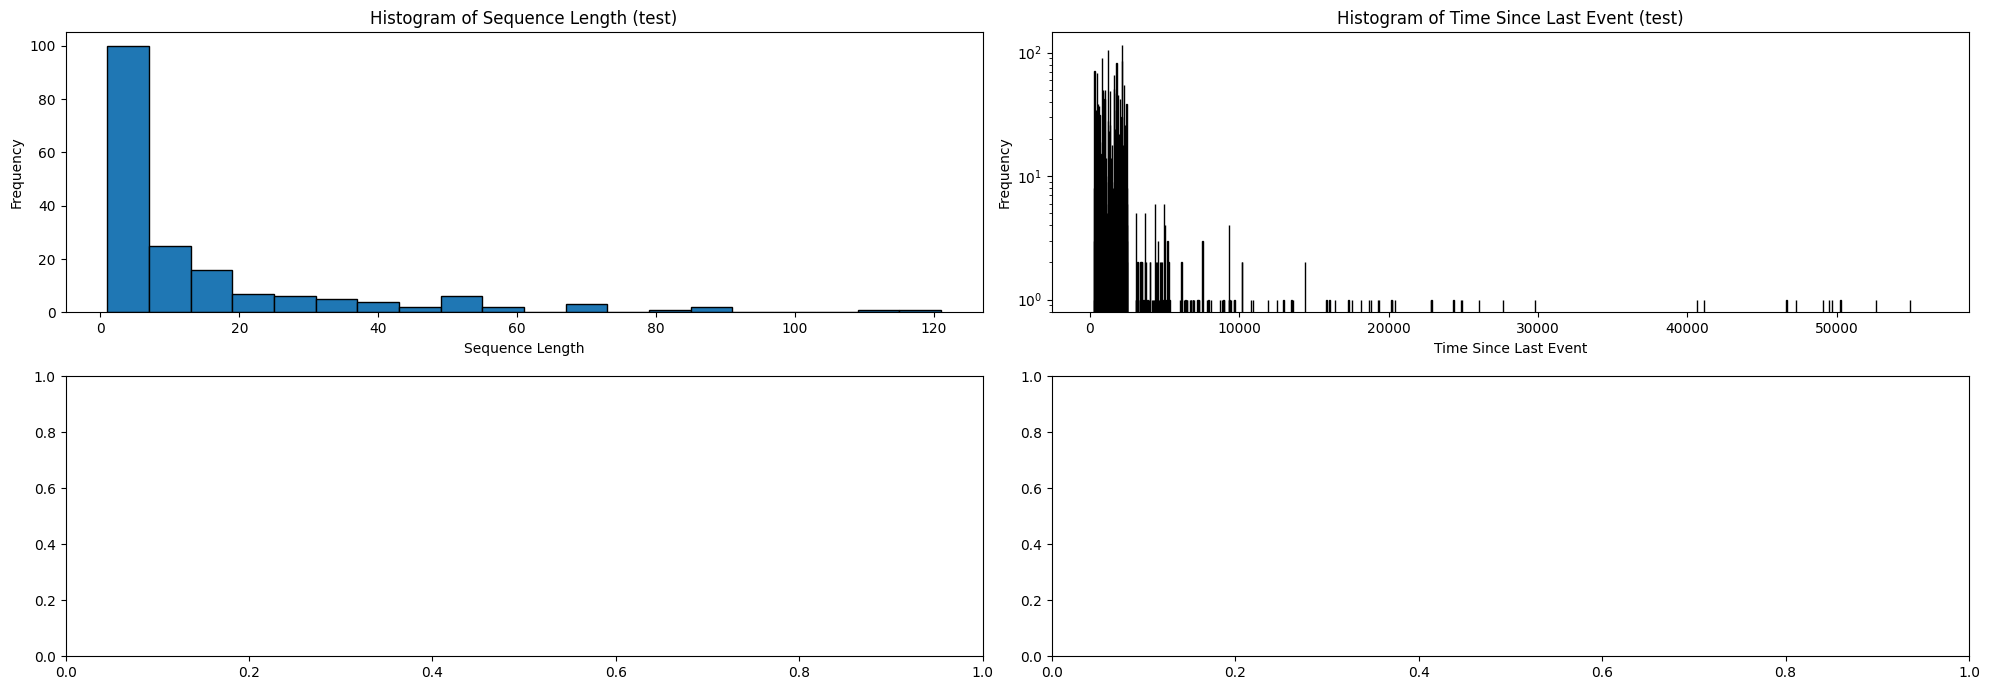

In [23]:
plot_stats(volcano_data, splits=["test"])

Event Type 0 for split train
Event Type 0 for split validation
Event Type 0 for split test


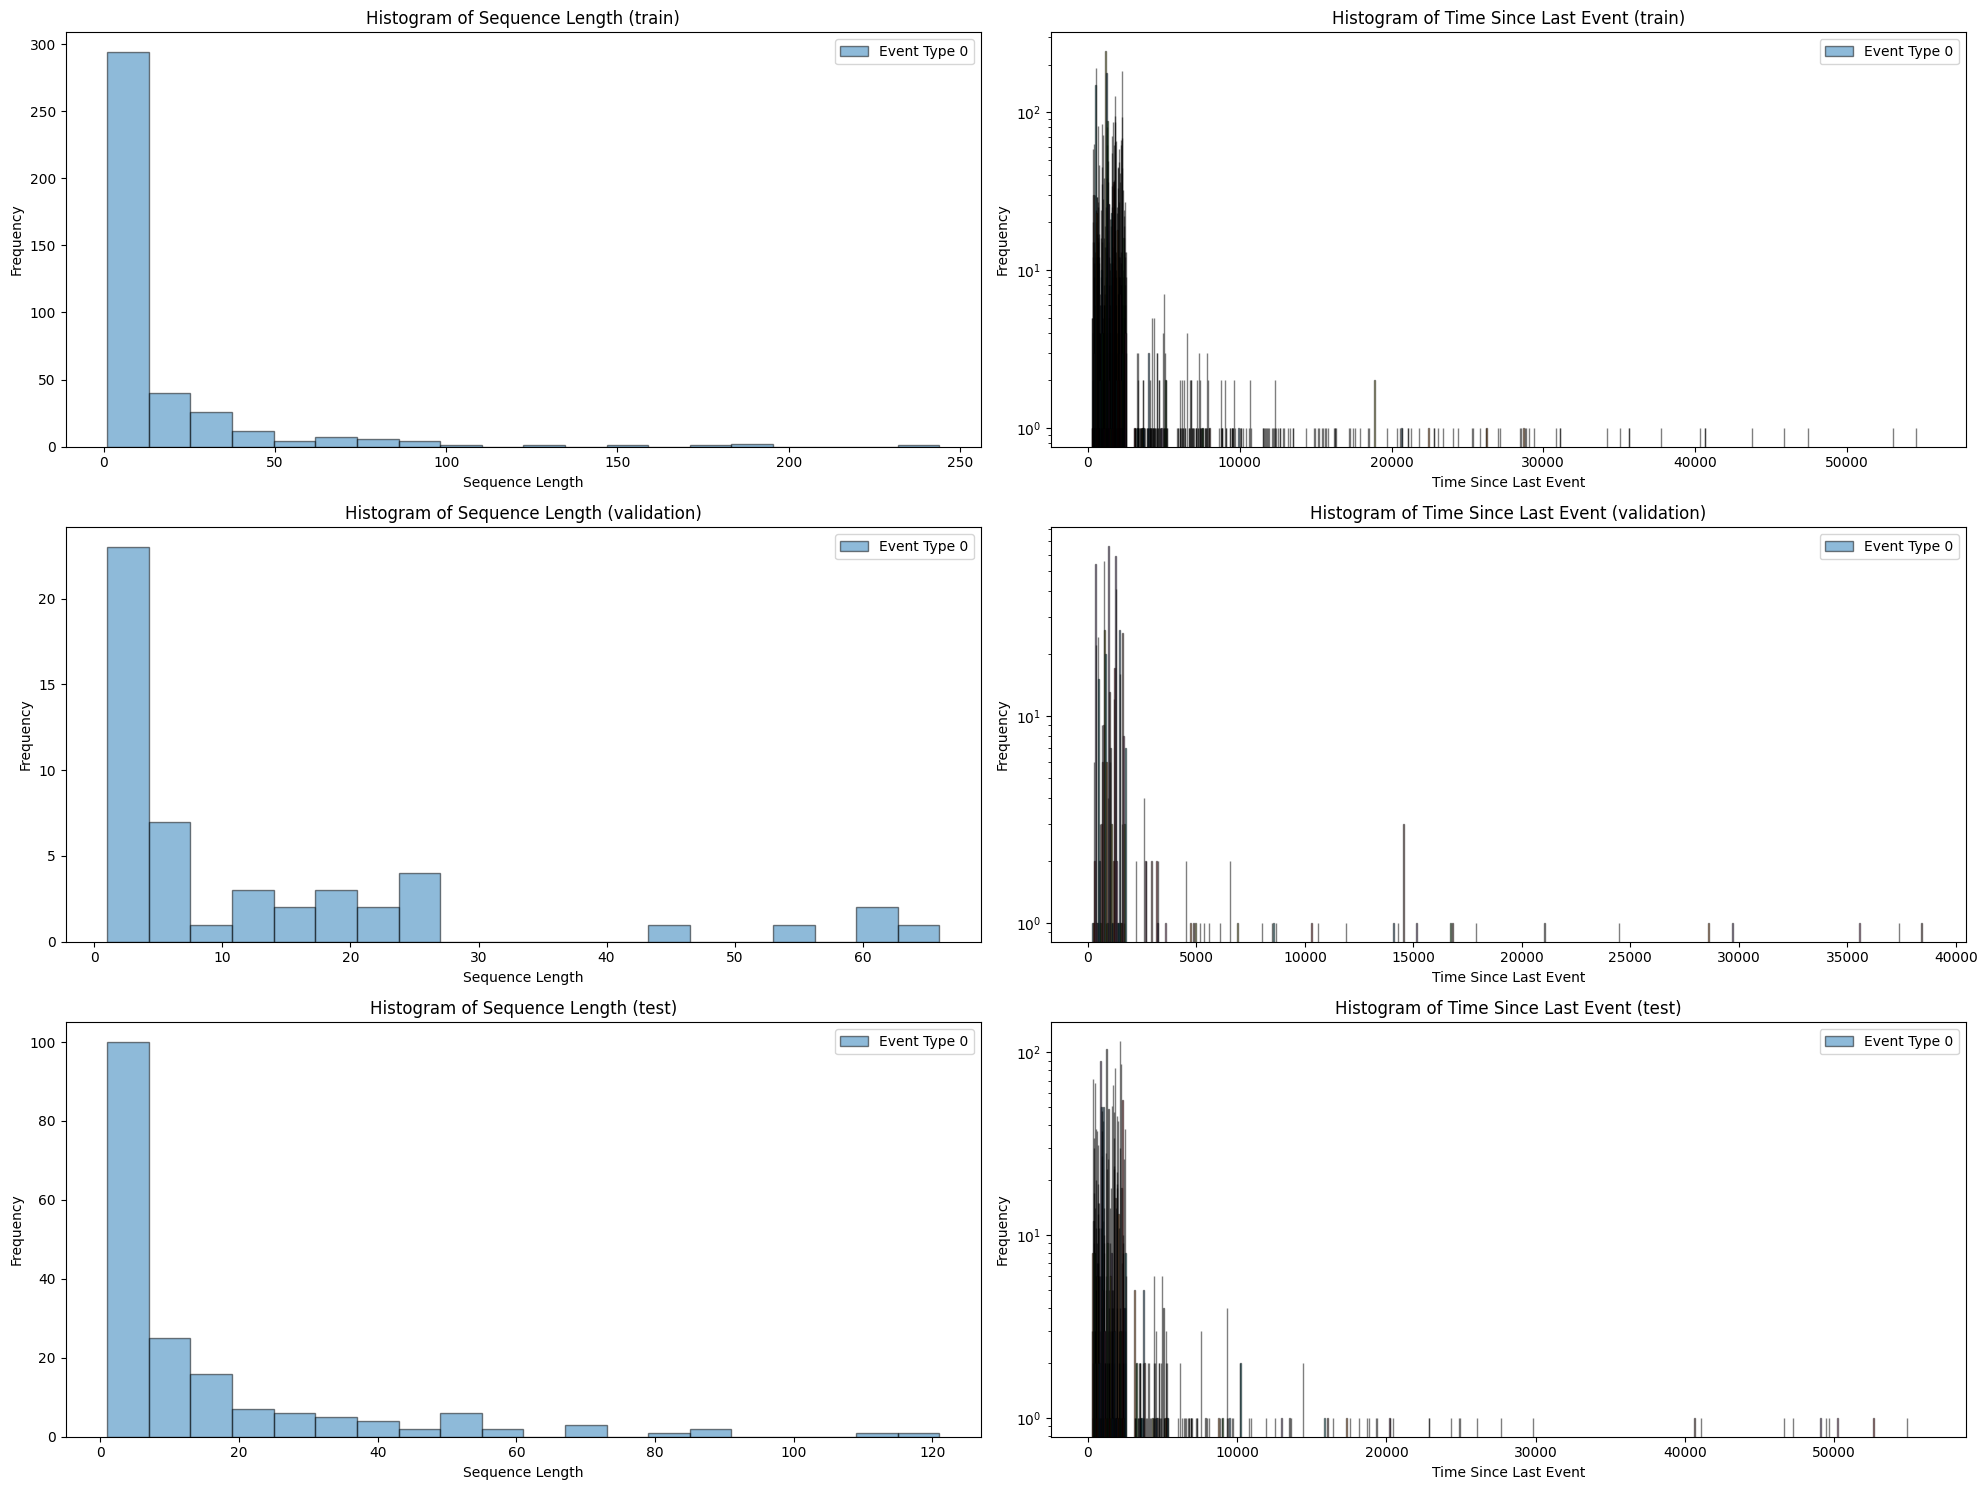

In [32]:
plot_stats_per_event_type(volcano_data)

# Taxi

In [54]:
print_stats(taxi_data)

{'avg_event_time': 0.21560524441445447,
 'avg_sequence_length': 37.05,
 'max_event_time': 5.246944444444444,
 'max_sequence_length': 38,
 'min_event_time': 0.0,
 'min_sequence_length': 36,
 'num_sequences': 400}


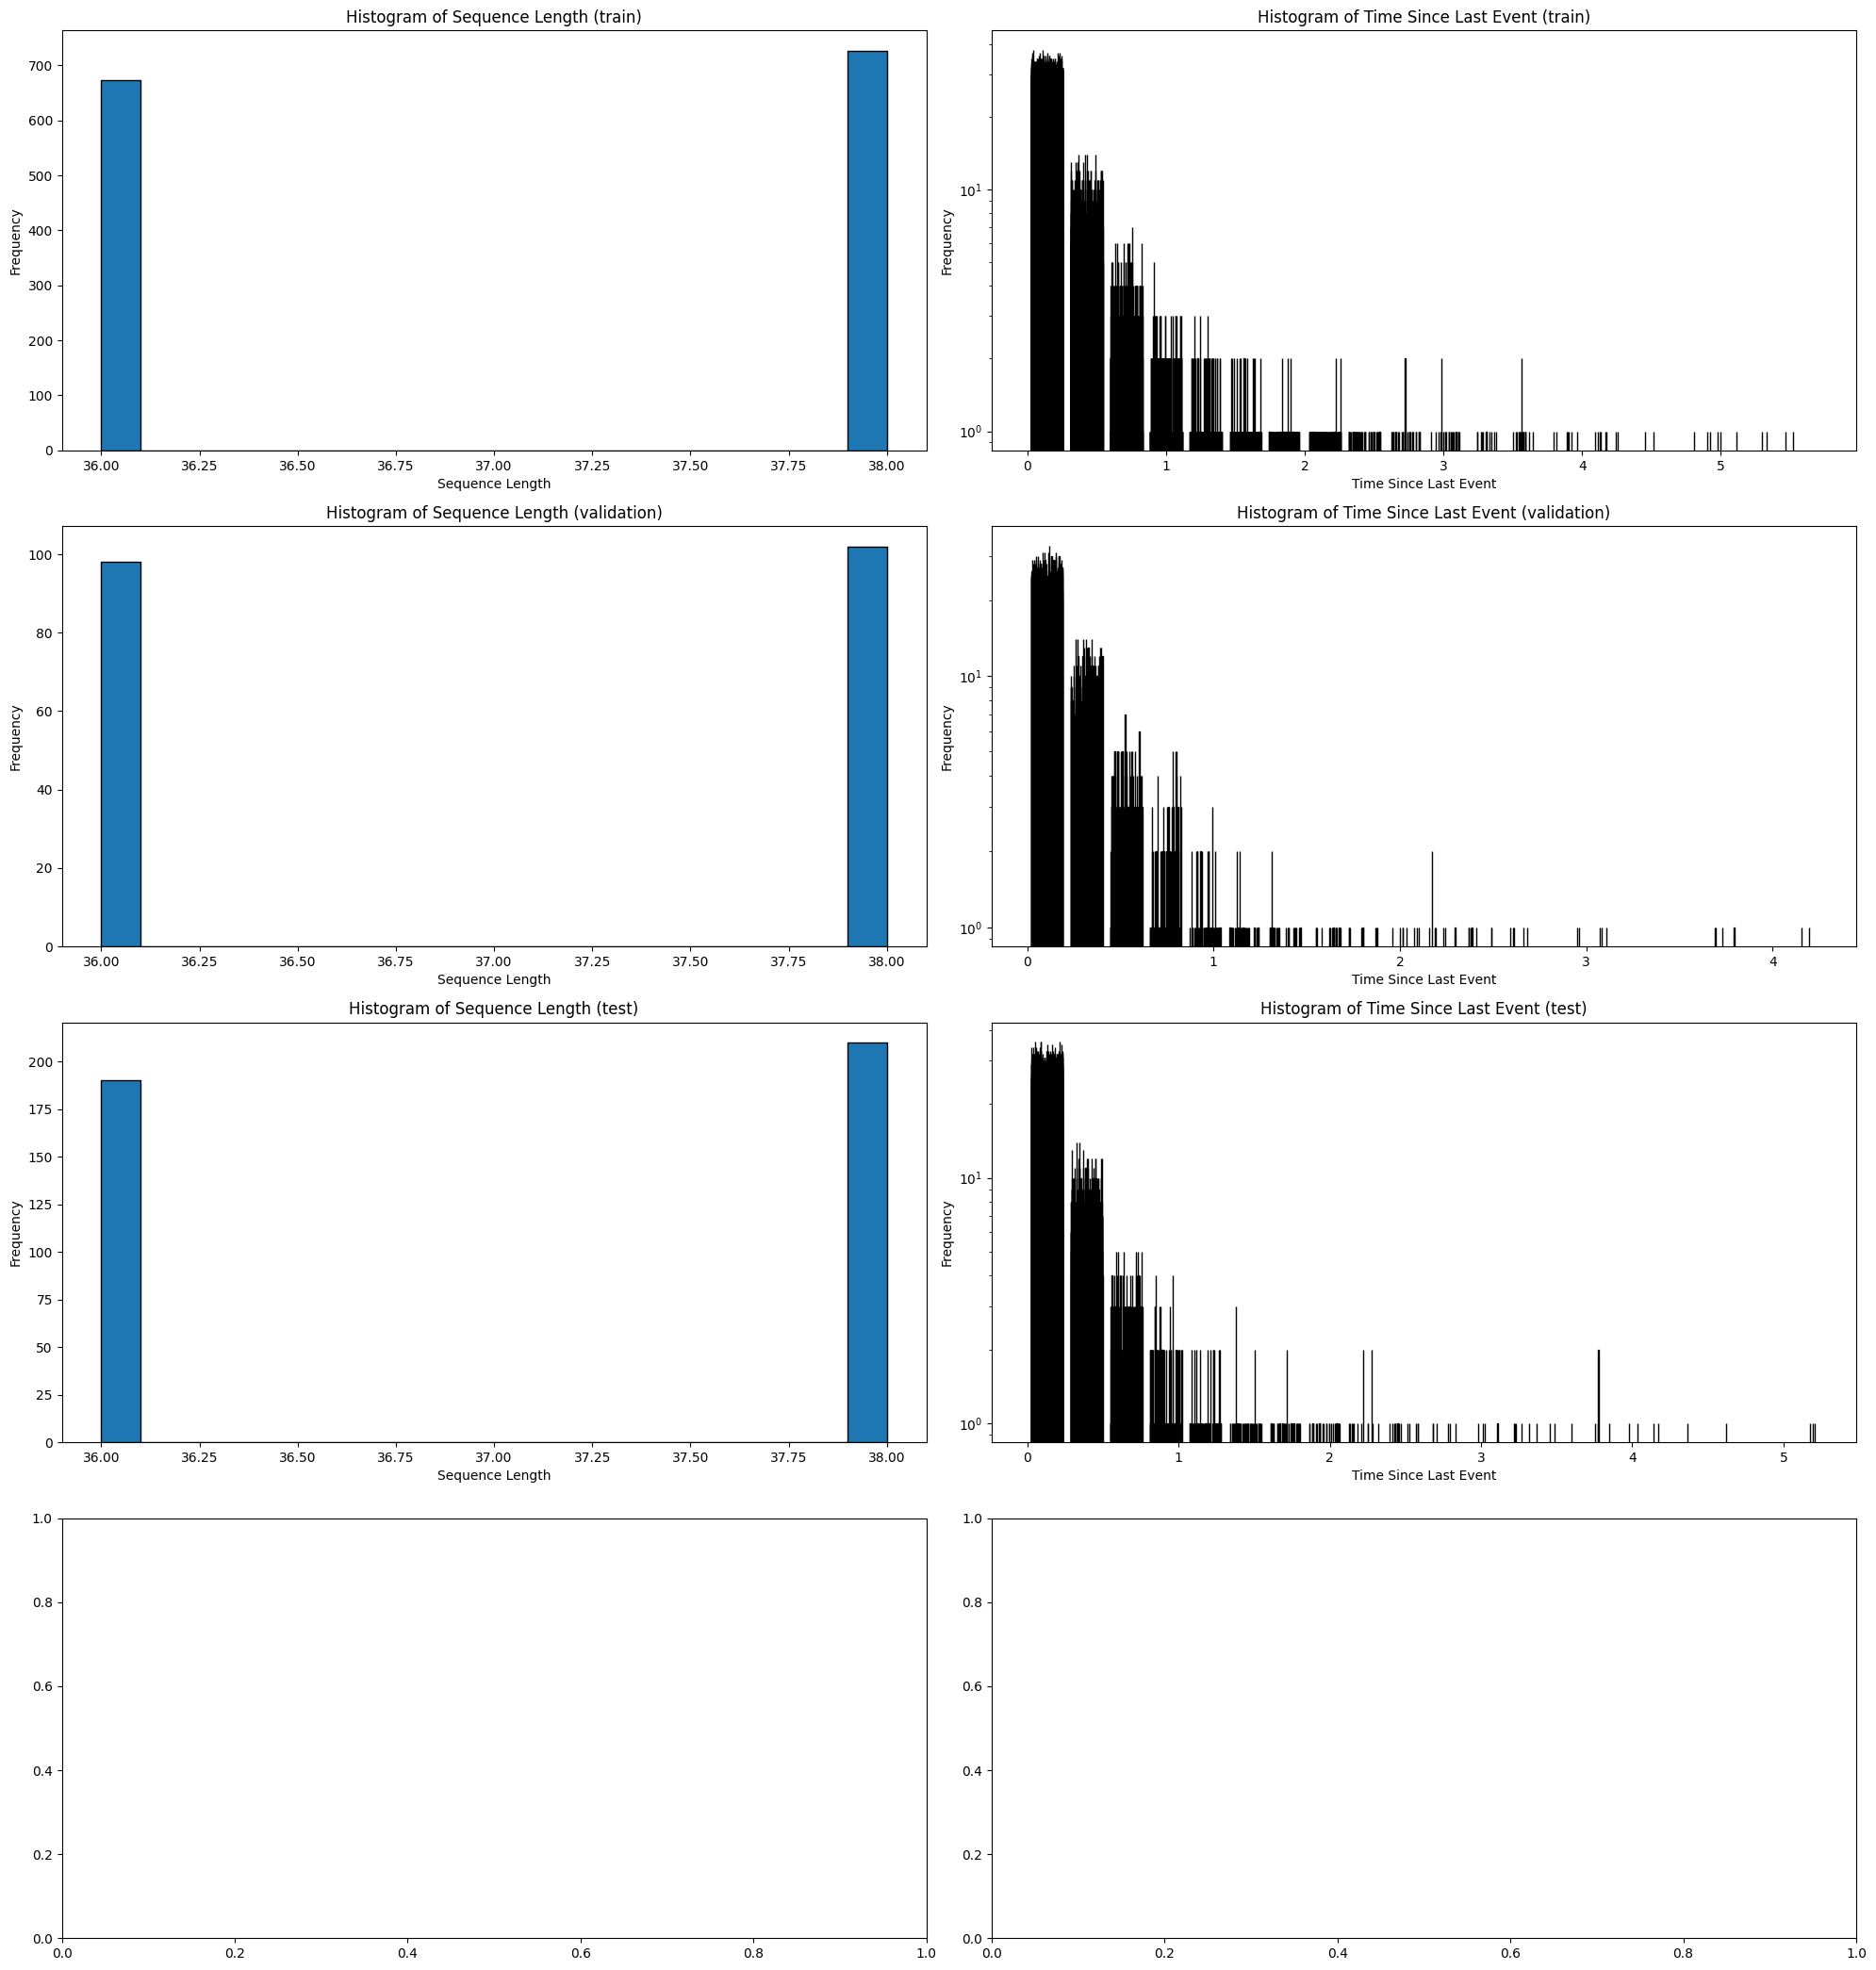

In [30]:
plot_stats(taxi_data)

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test


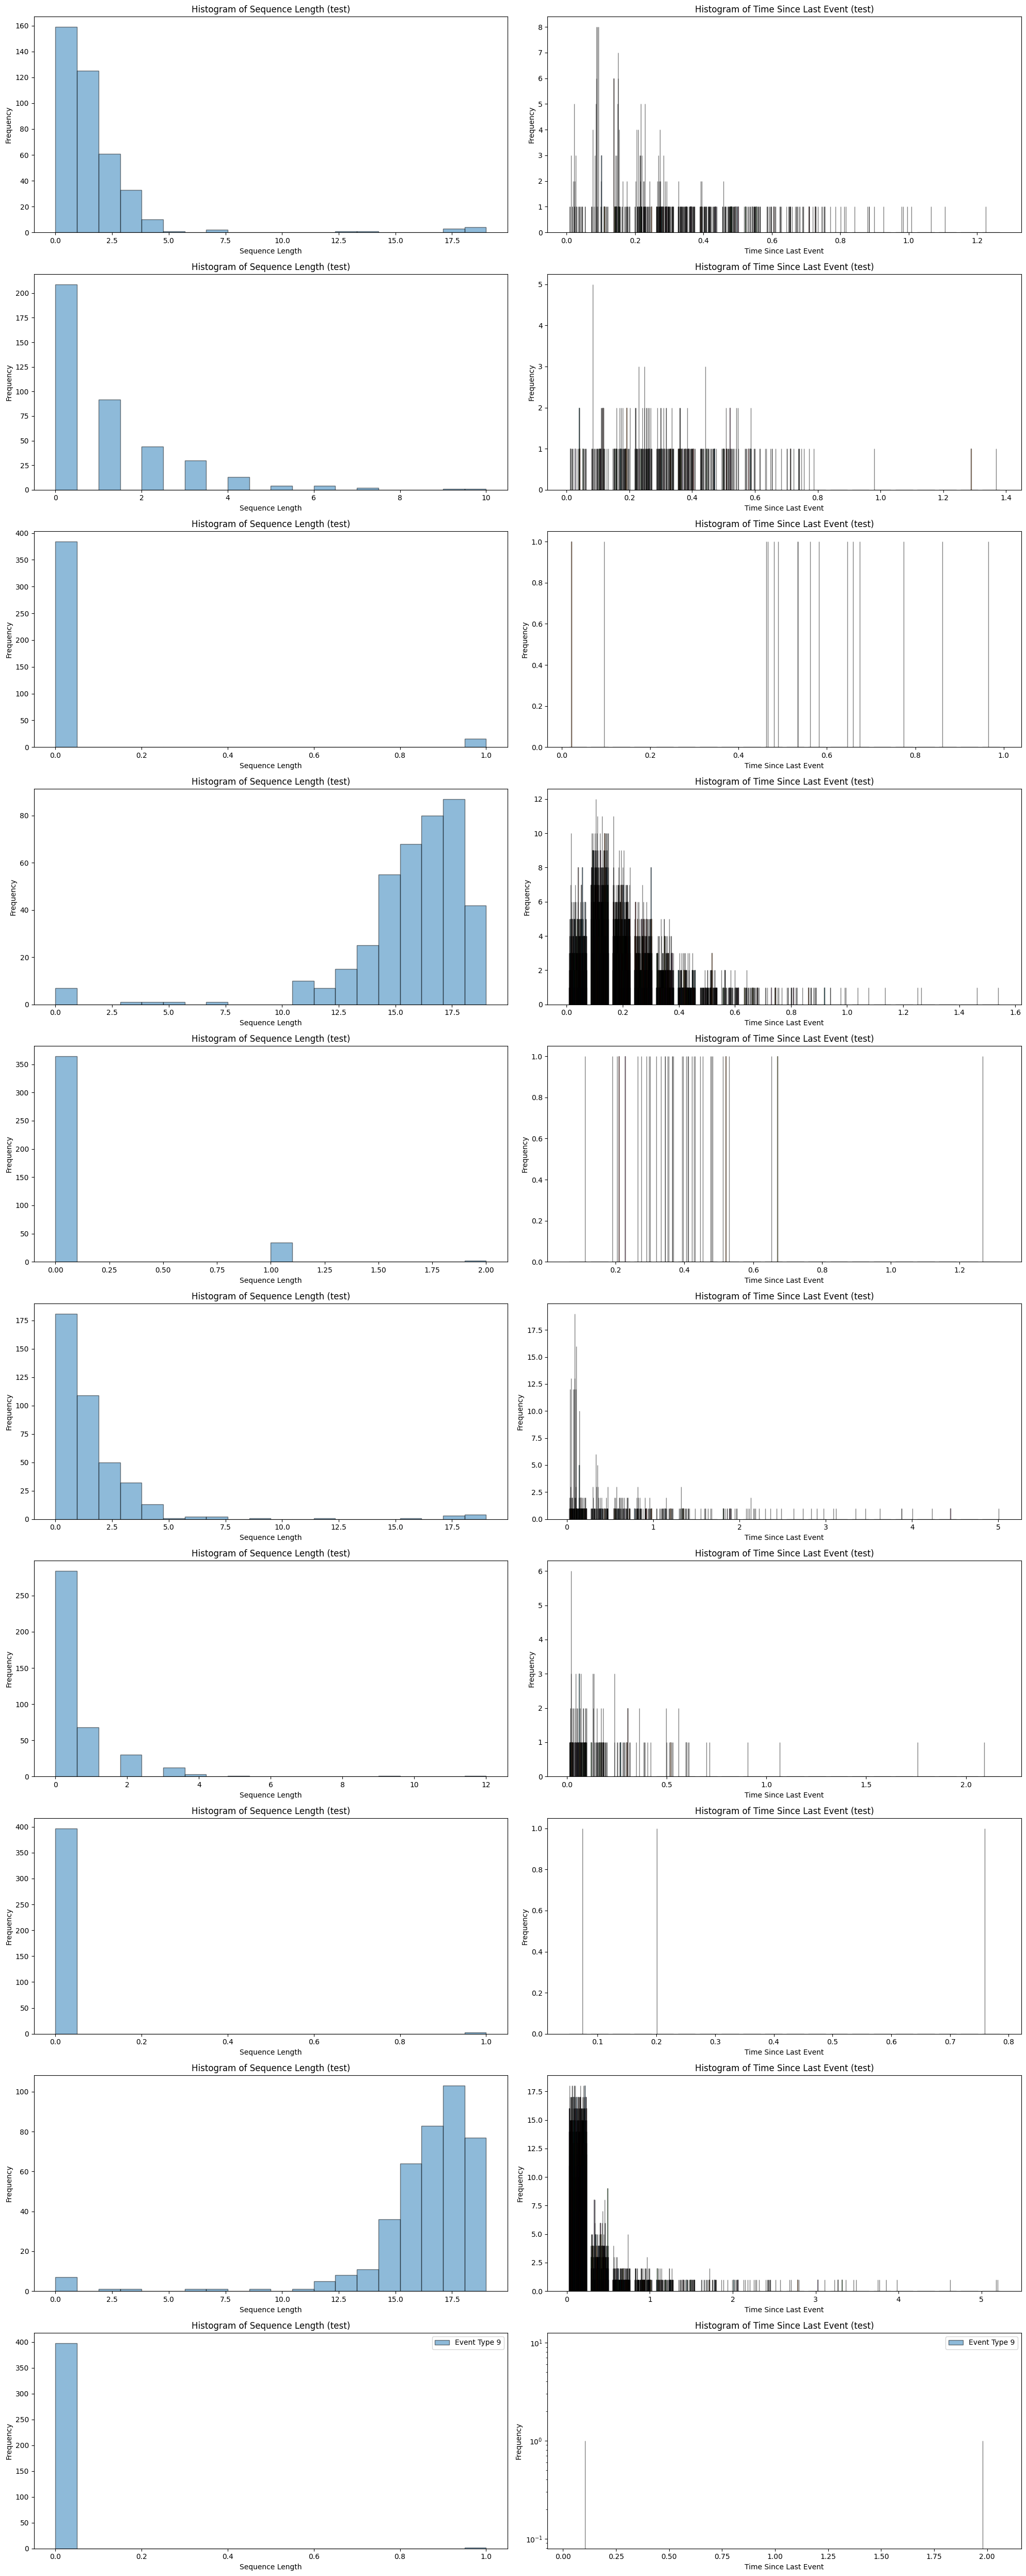

In [31]:
plot_stats_per_event_type(taxi_data, splits=["test"])

# Retweet

In [55]:
print_stats(retweet_data)

{'avg_event_time': 2549.3492138328793,
 'avg_sequence_length': 109.2325,
 'max_event_time': 520178.0,
 'max_sequence_length': 264,
 'min_event_time': 0.0,
 'min_sequence_length': 50,
 'num_sequences': 2000}


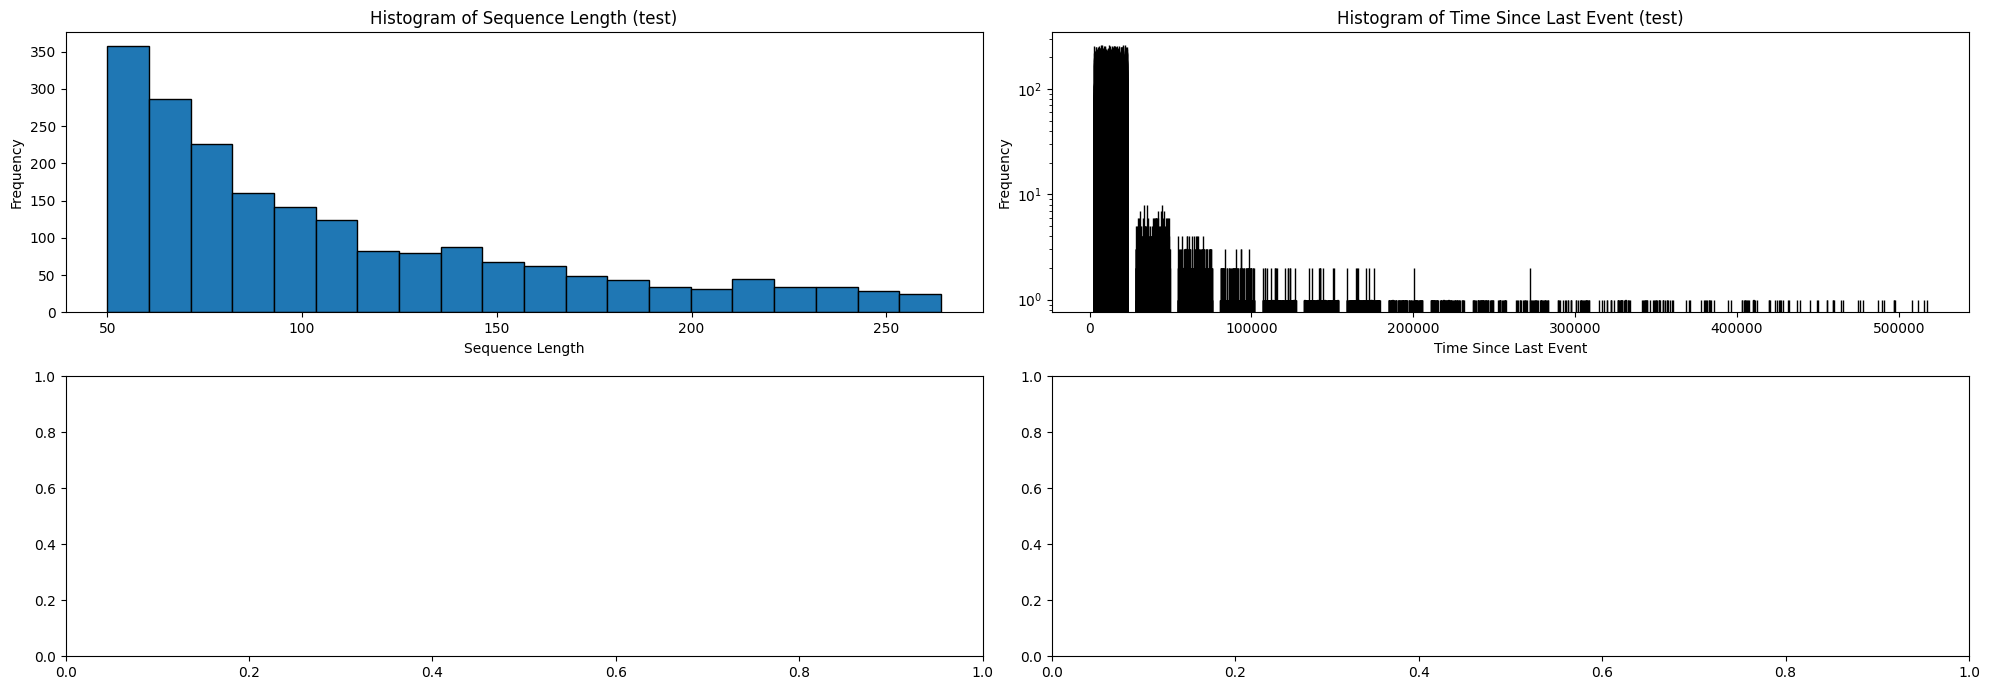

In [24]:
plot_stats(retweet_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test


/var/folders/q0/p3s41w8j47lf1mmsgpybt45w000b6g/T/ipykernel_85820/683559192.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/kcvejoski/.virtualenvs/fim/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


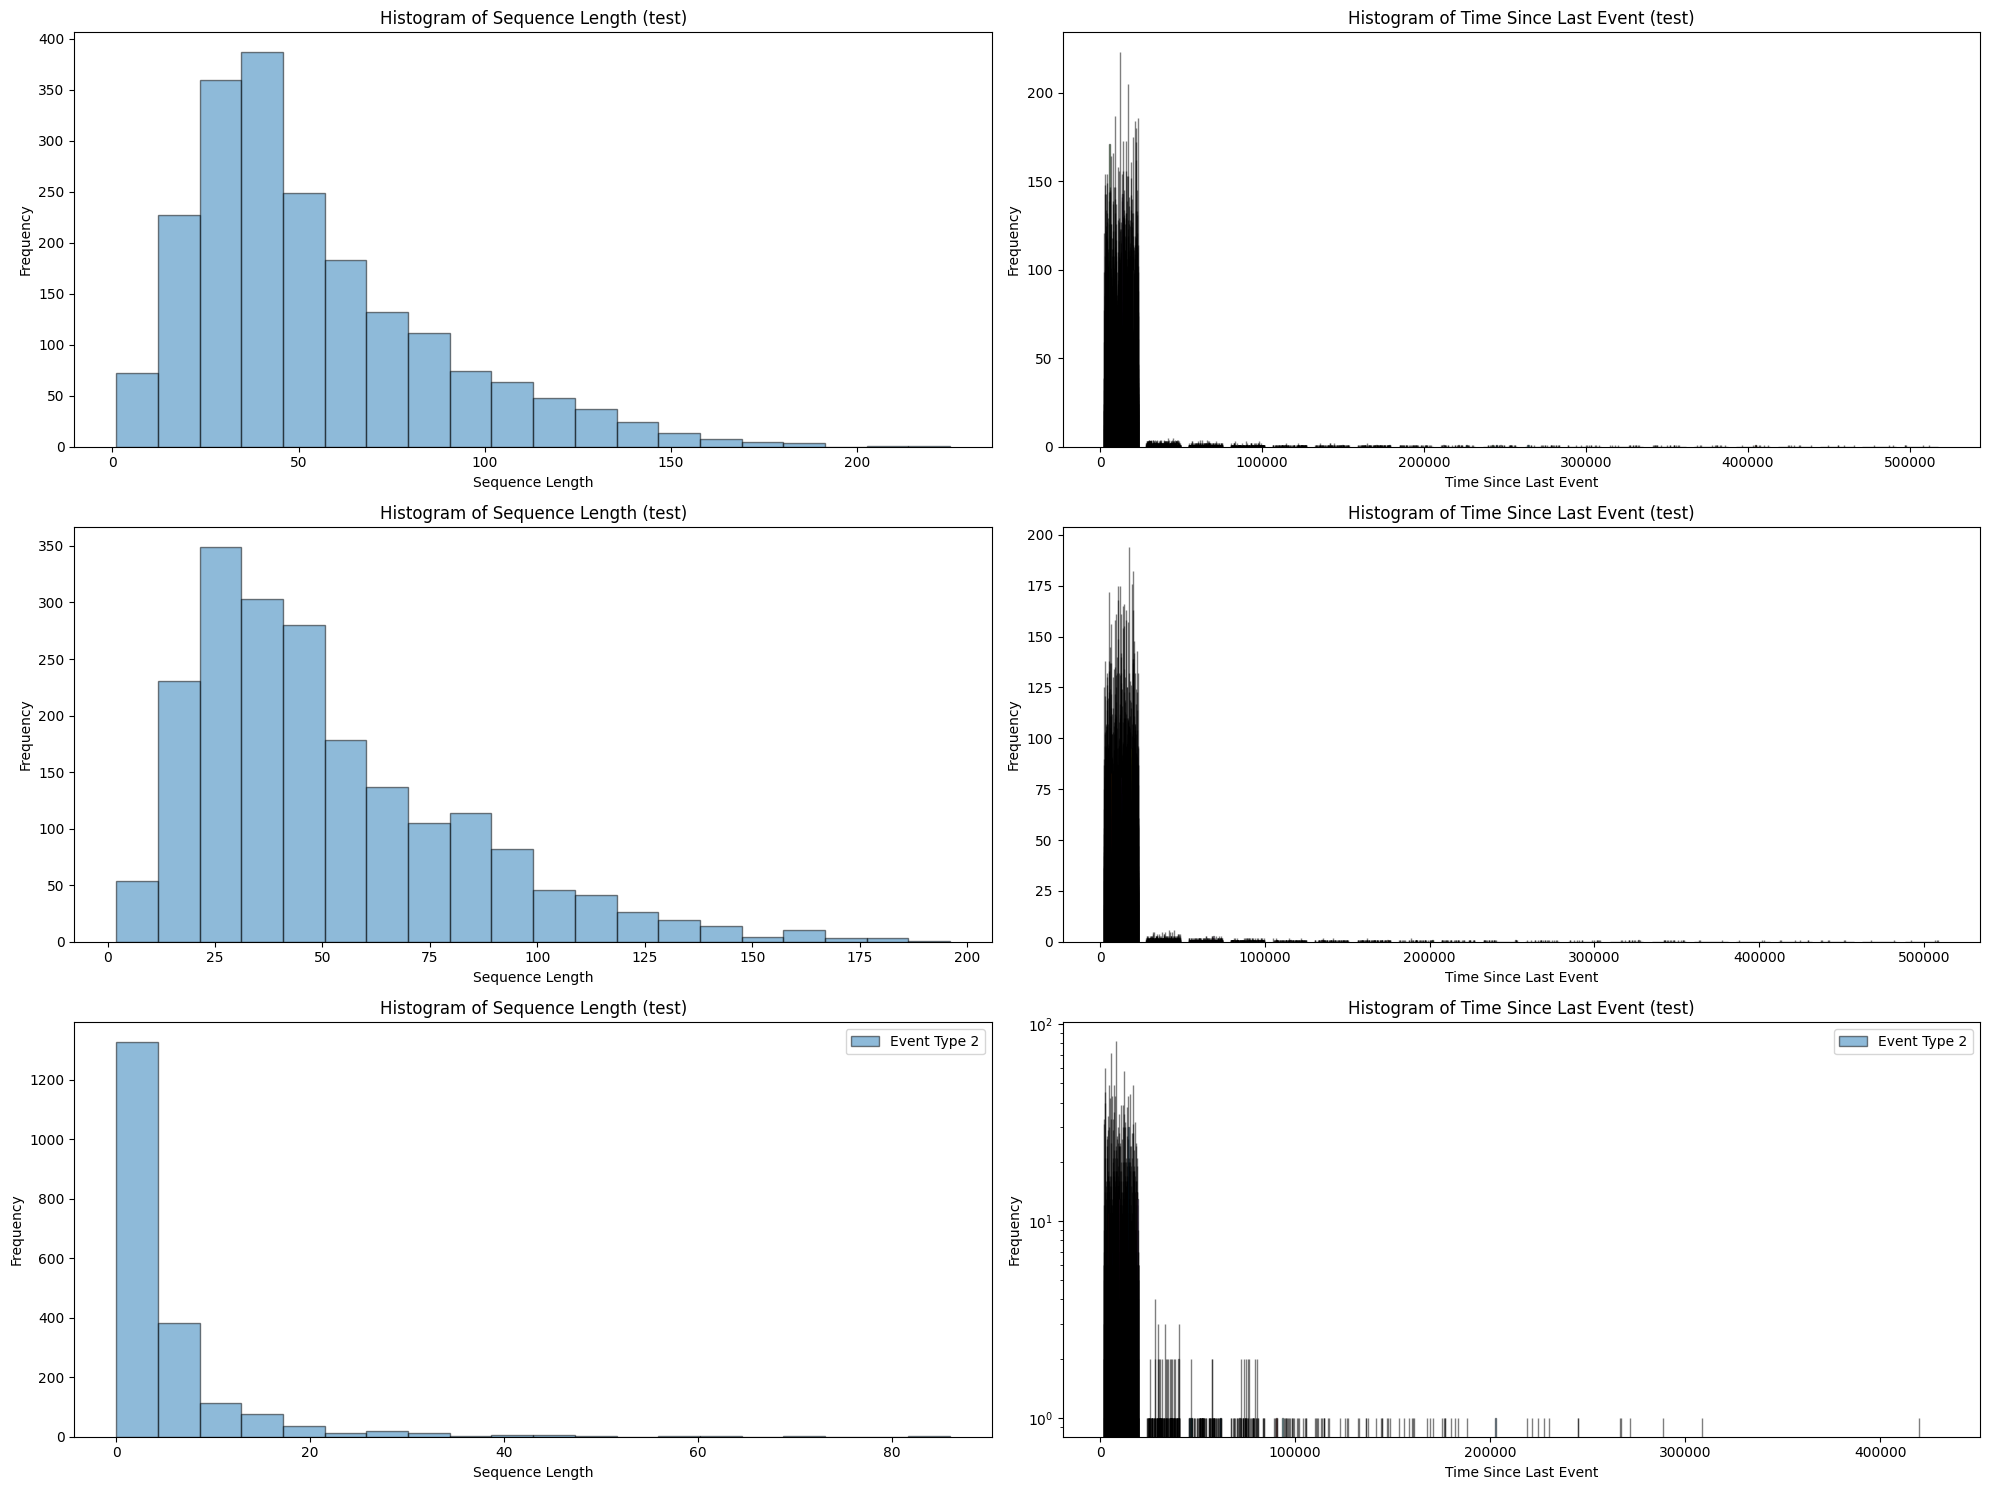

In [25]:
plot_stats_per_event_type(retweet_data, splits=["test"])

# Earthquake

In [57]:
print_stats(earthquake_data)

{'avg_event_time': 0.8363940567873539,
 'avg_sequence_length': 16.386666666666667,
 'max_event_time': 22.411191499995766,
 'max_sequence_length': 18,
 'min_event_time': 0.0,
 'min_sequence_length': 0,
 'num_sequences': 900}


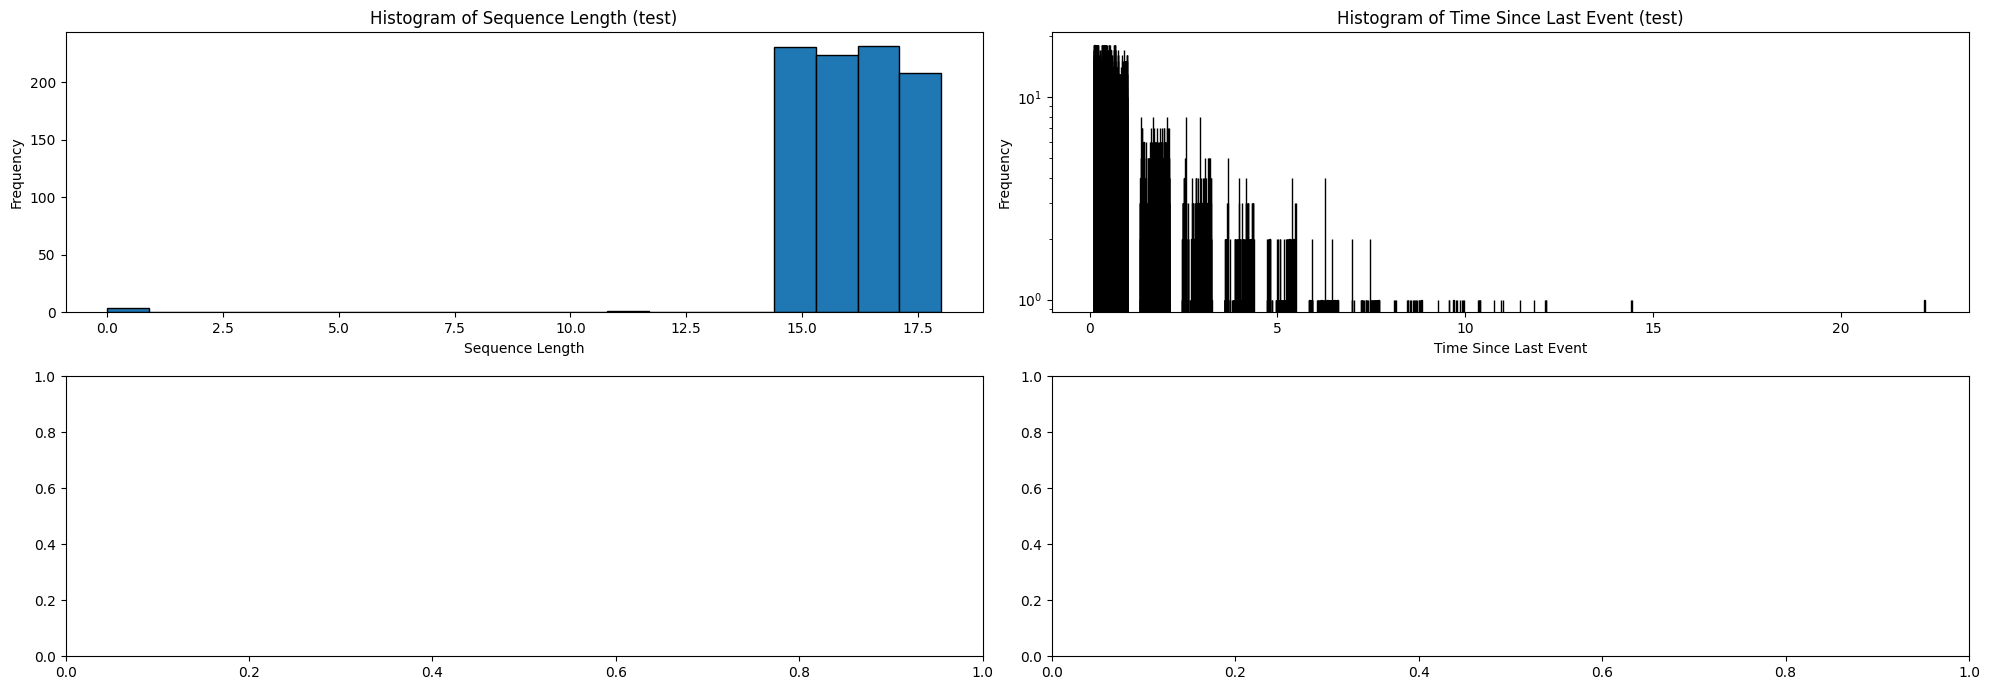

In [26]:
plot_stats(earthquake_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test


/var/folders/q0/p3s41w8j47lf1mmsgpybt45w000b6g/T/ipykernel_85820/683559192.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


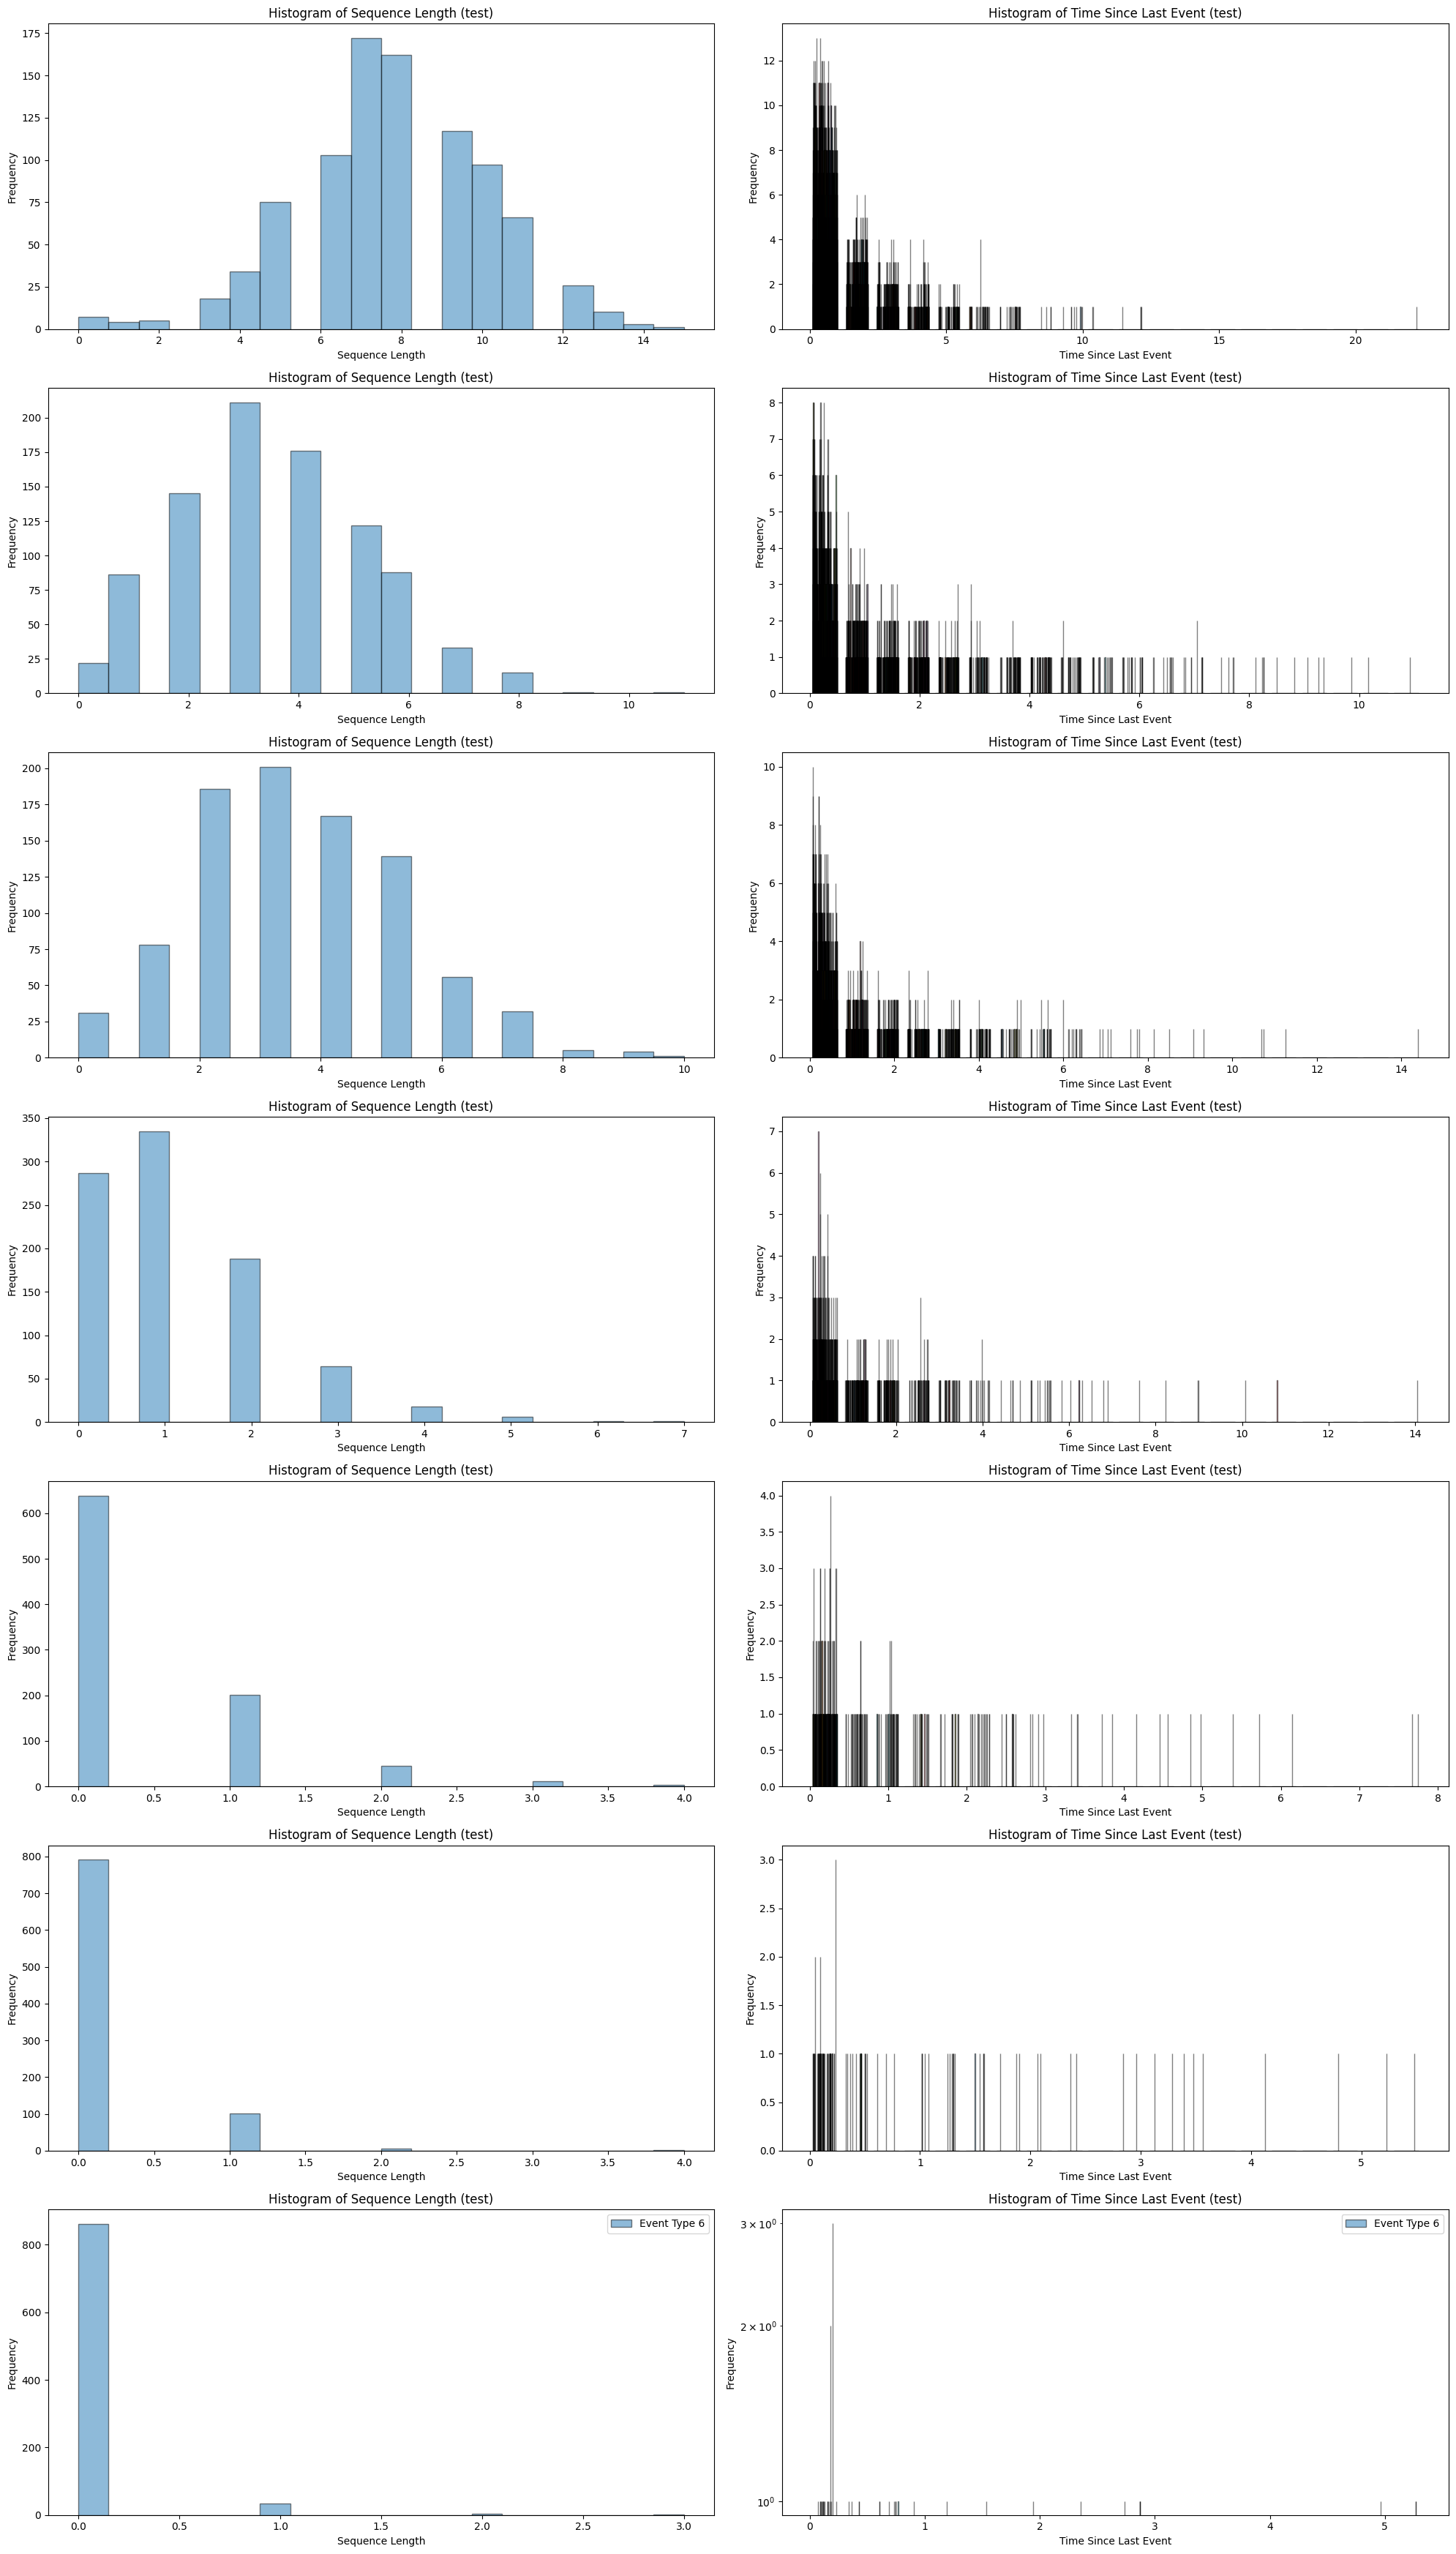

In [27]:
plot_stats_per_event_type(earthquake_data, splits=["test"])

# Amazon

In [58]:
print_stats(amazon_data)

{'avg_event_time': 0.5073311559431769,
 'avg_sequence_length': 45.40680713128039,
 'max_event_time': 0.799998696973307,
 'max_sequence_length': 94,
 'min_event_time': 0.0,
 'min_sequence_length': 14,
 'num_sequences': 1851}


In [7]:
print_stats(amazon_data, split="train")

{'avg_event_time': 0.5092928082067617,
 'avg_sequence_length': 44.68190269600248,
 'max_event_time': 0.7999971801394421,
 'max_sequence_length': 94,
 'min_event_time': 0.0,
 'min_sequence_length': 14,
 'num_sequences': 6454}


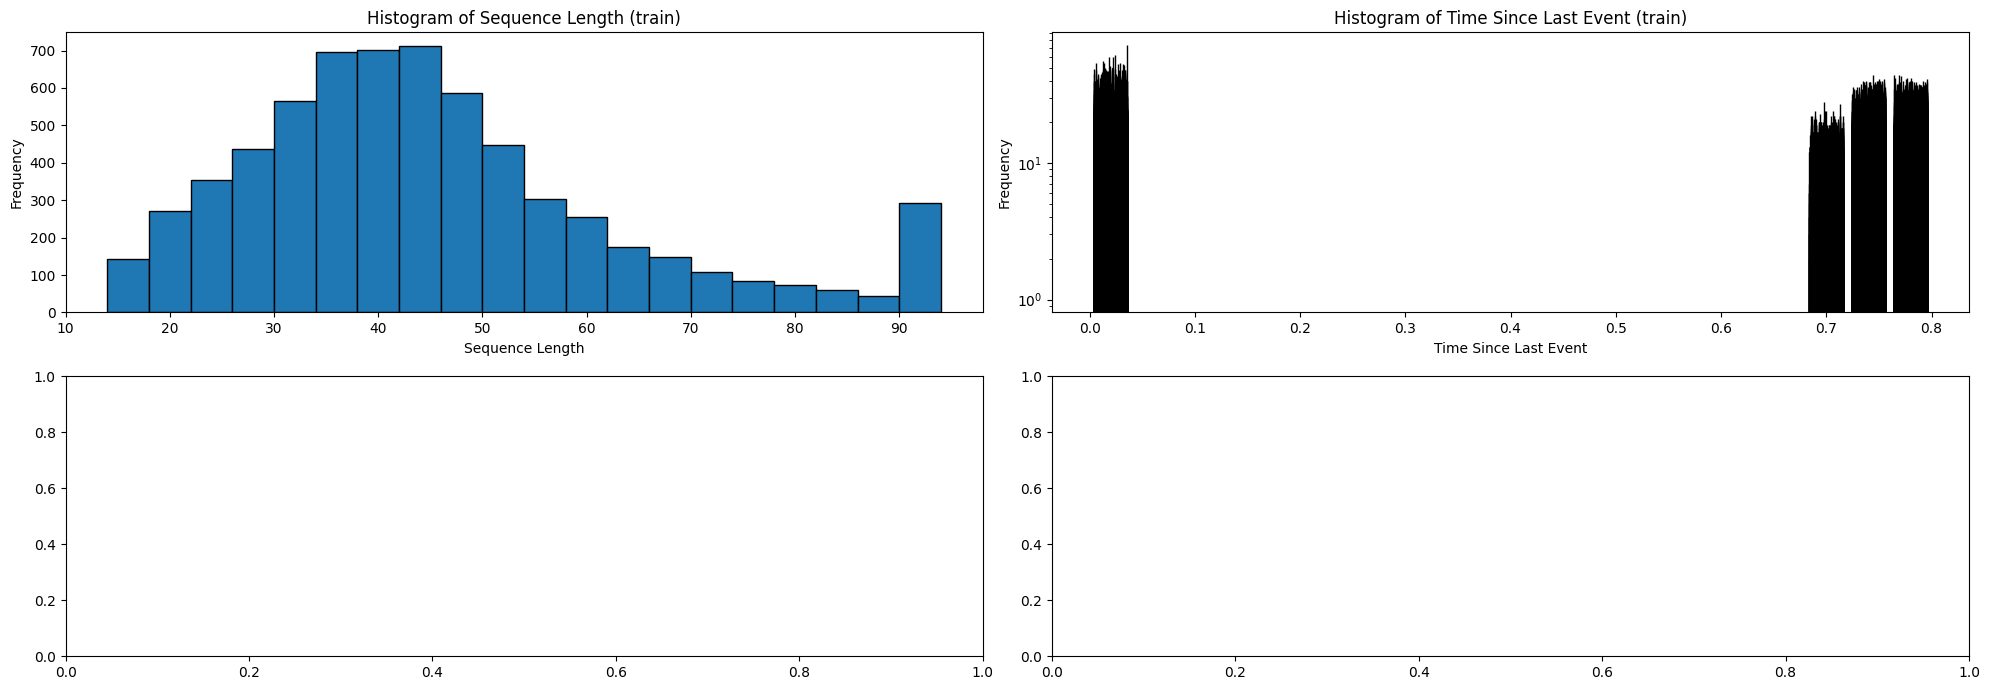

In [6]:
plot_stats(amazon_data, splits=["train"])

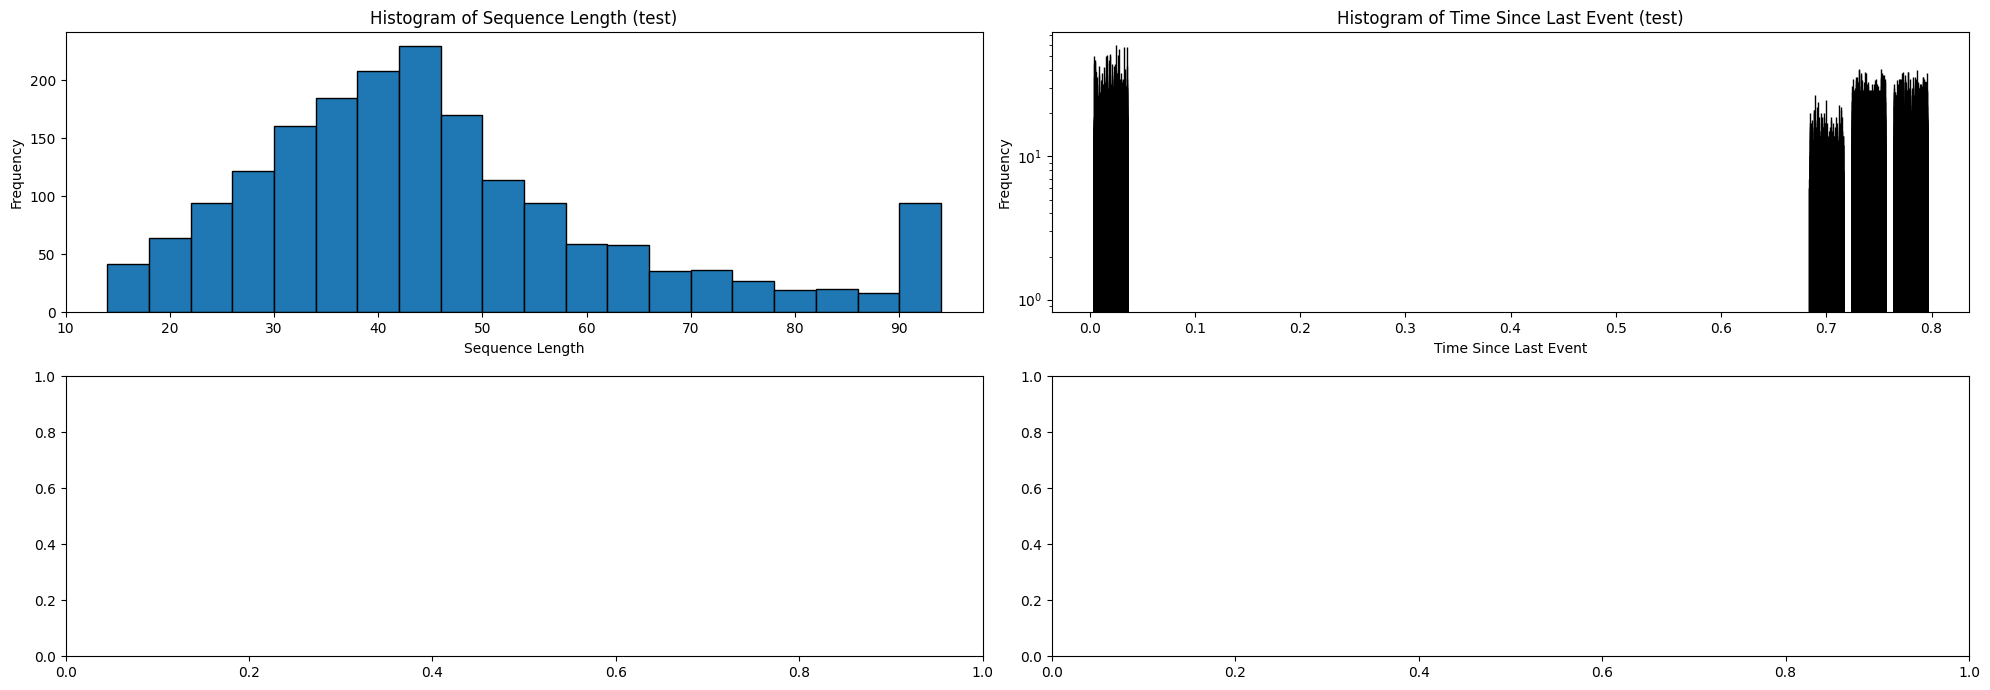

In [28]:
plot_stats(amazon_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test
Event Type 10 for split test
Event Type 11 for split test
Event Type 12 for split test
Event Type 13 for split test
Event Type 14 for split test
Event Type 15 for split test


/var/folders/q0/p3s41w8j47lf1mmsgpybt45w000b6g/T/ipykernel_85820/683559192.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/kcvejoski/.virtualenvs/fim/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


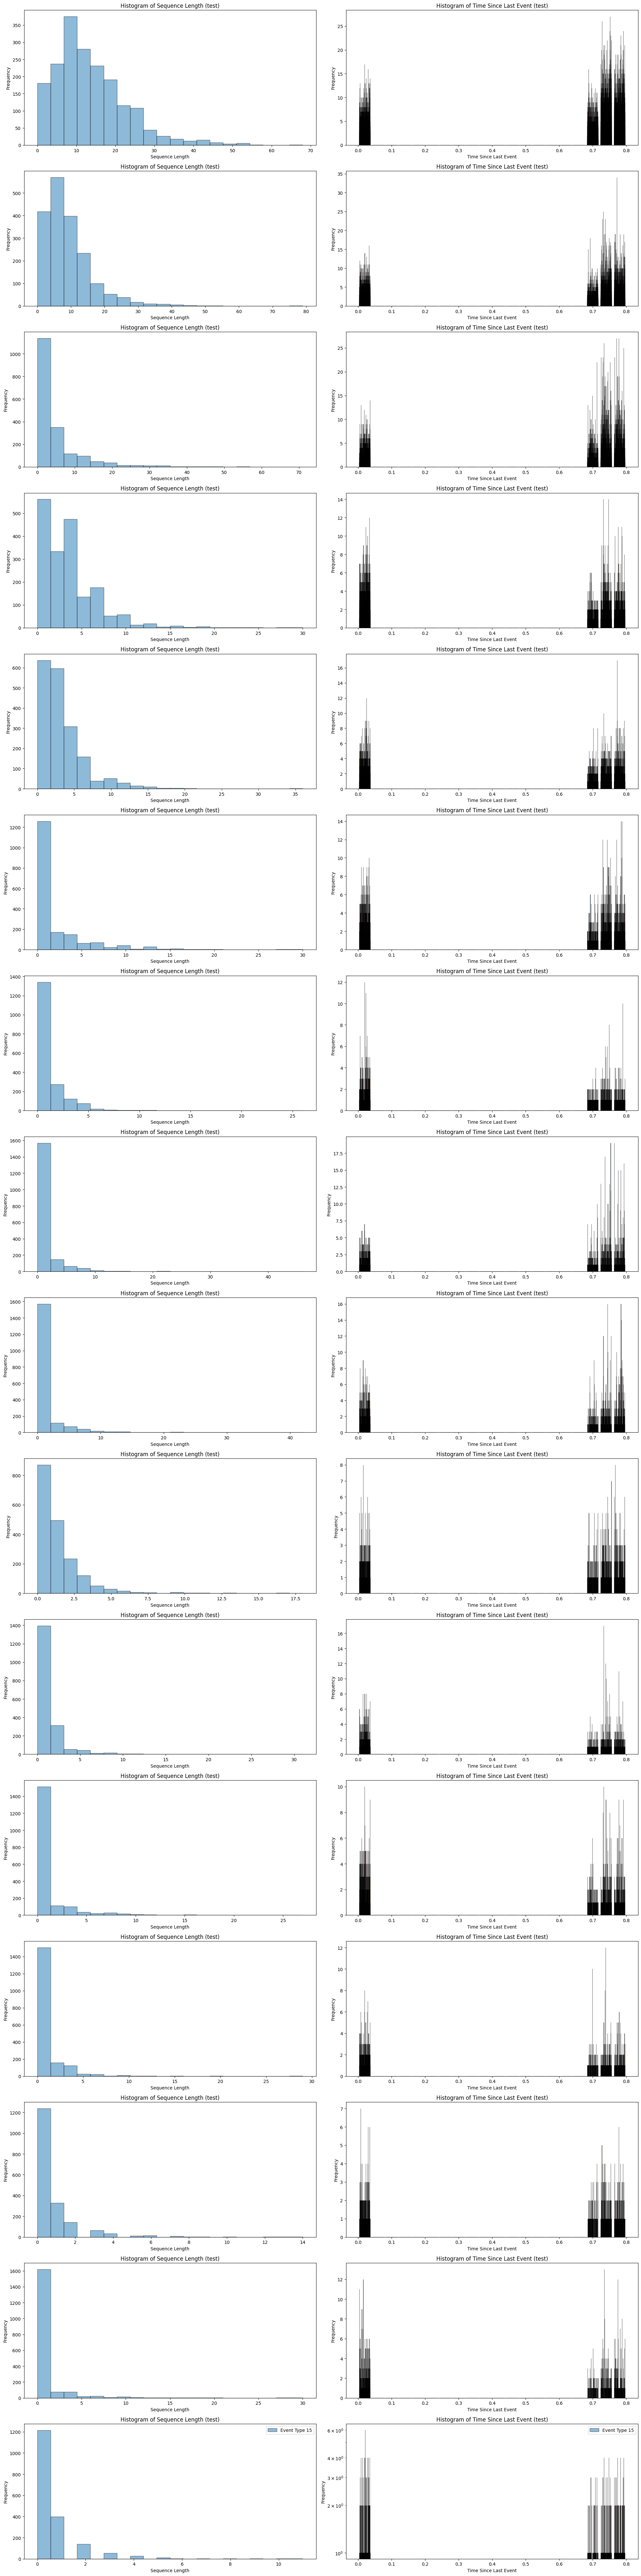

In [29]:
plot_stats_per_event_type(amazon_data, splits=["test"])

# Taobao

In [59]:
print_stats(taobao_data)

{'avg_event_time': 0.04552837176115716,
 'avg_sequence_length': 56.91,
 'max_event_time': 0.9978999999875661,
 'max_sequence_length': 64,
 'min_event_time': 0.0,
 'min_sequence_length': 32,
 'num_sequences': 500}


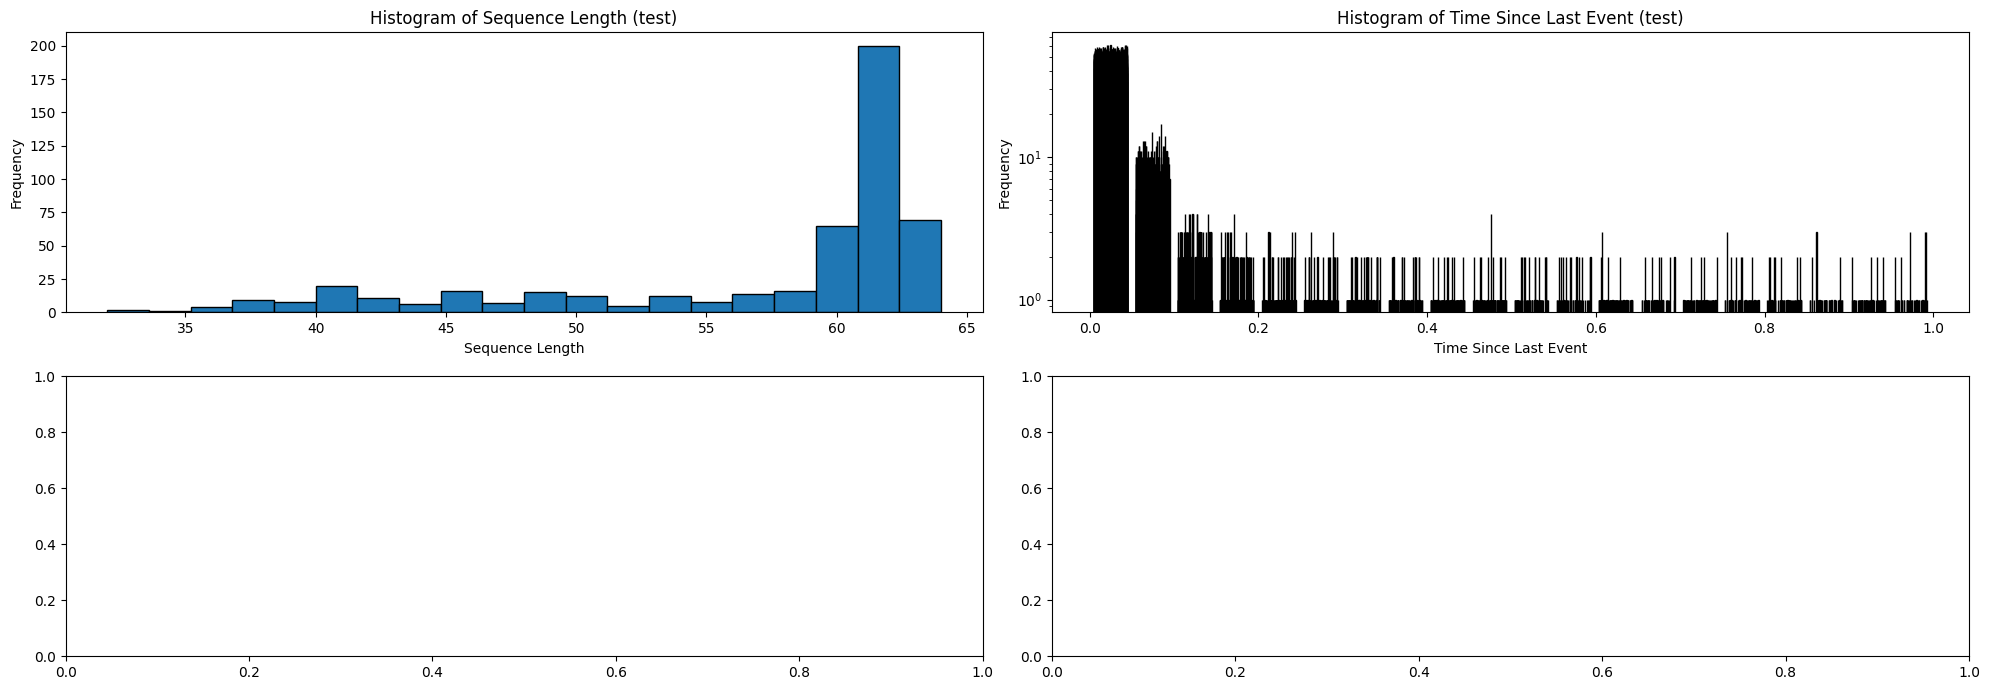

In [33]:
plot_stats(taobao_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test
Event Type 10 for split test
Event Type 11 for split test
Event Type 12 for split test
Event Type 13 for split test
Event Type 14 for split test
Event Type 15 for split test
Event Type 16 for split test


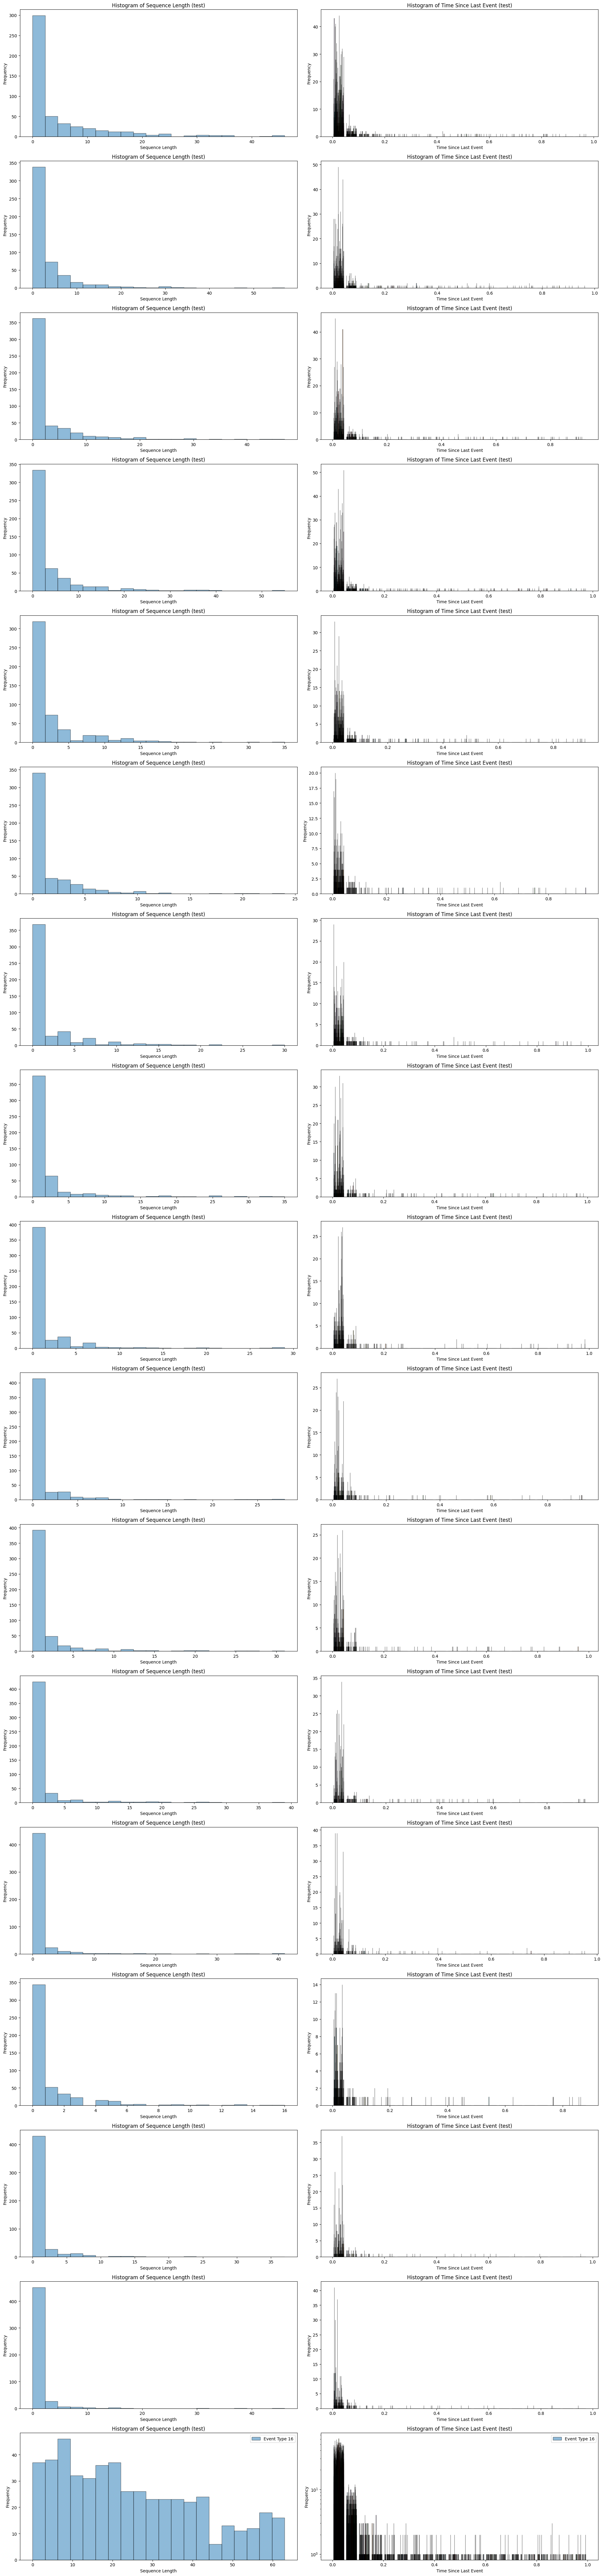

In [34]:
plot_stats_per_event_type(taobao_data, splits=["test"])

# Stackoverflow

In [60]:
print_stats(stackoverflow_data)

{'avg_event_time': 0.8516713082048633,
 'avg_sequence_length': 66.12967581047381,
 'max_event_time': 17.1324462890625,
 'max_sequence_length': 101,
 'min_event_time': 0.0,
 'min_sequence_length': 41,
 'num_sequences': 401}


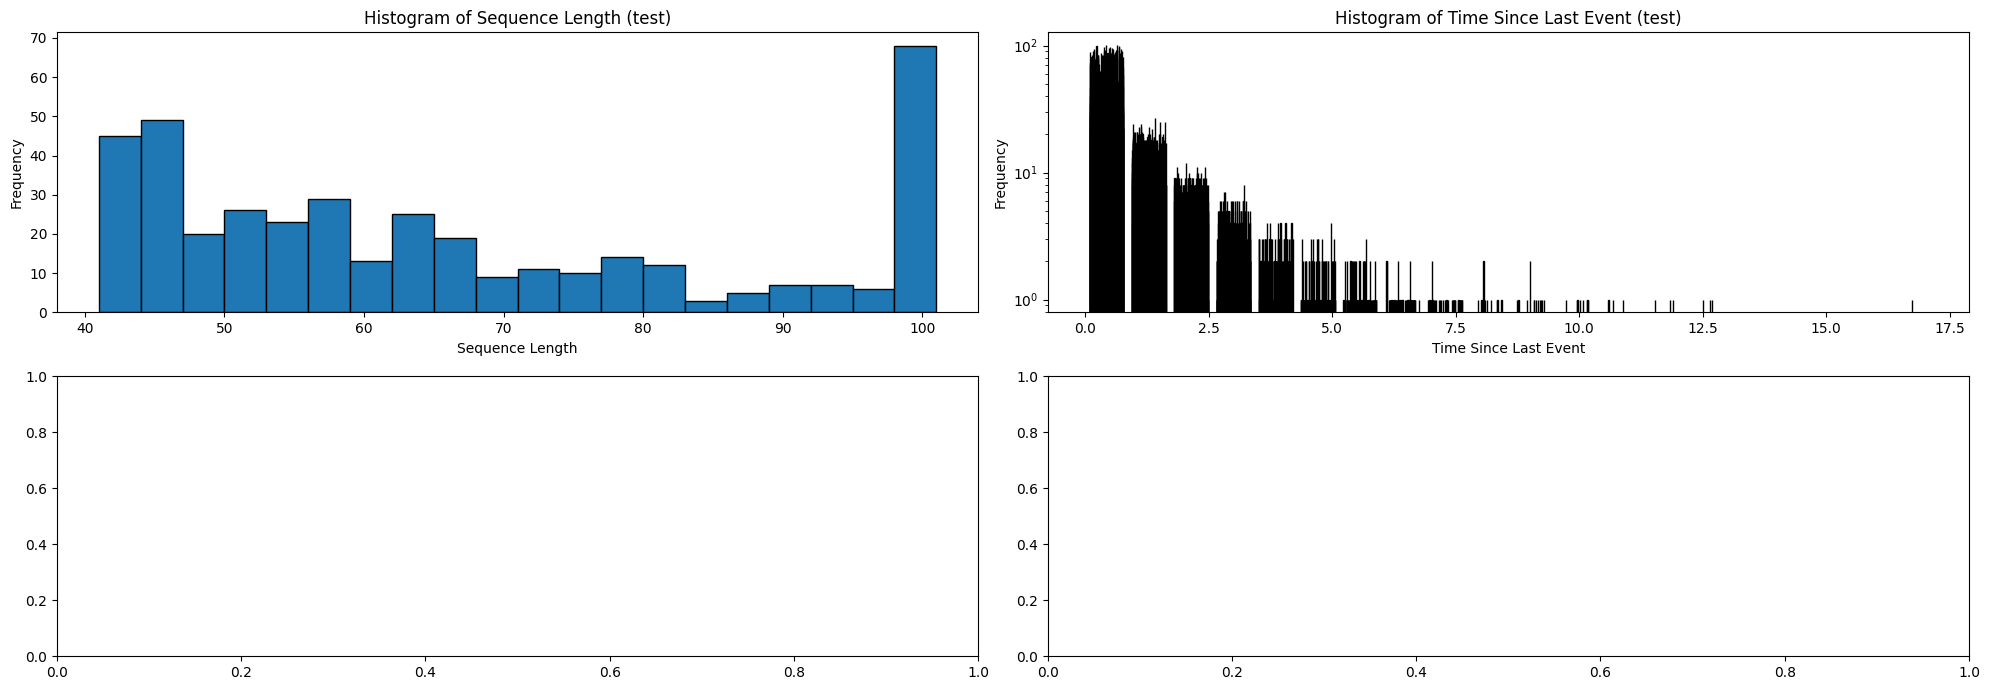

In [35]:
plot_stats(stackoverflow_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test
Event Type 10 for split test
Event Type 11 for split test
Event Type 12 for split test
Event Type 13 for split test
Event Type 14 for split test
Event Type 15 for split test
Event Type 16 for split test
Event Type 17 for split test
Event Type 18 for split test
Event Type 19 for split test
Event Type 20 for split test
Event Type 21 for split test


/var/folders/q0/p3s41w8j47lf1mmsgpybt45w000b6g/T/ipykernel_85820/683559192.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[i*num_events + event_type, 1].set_yscale('log')


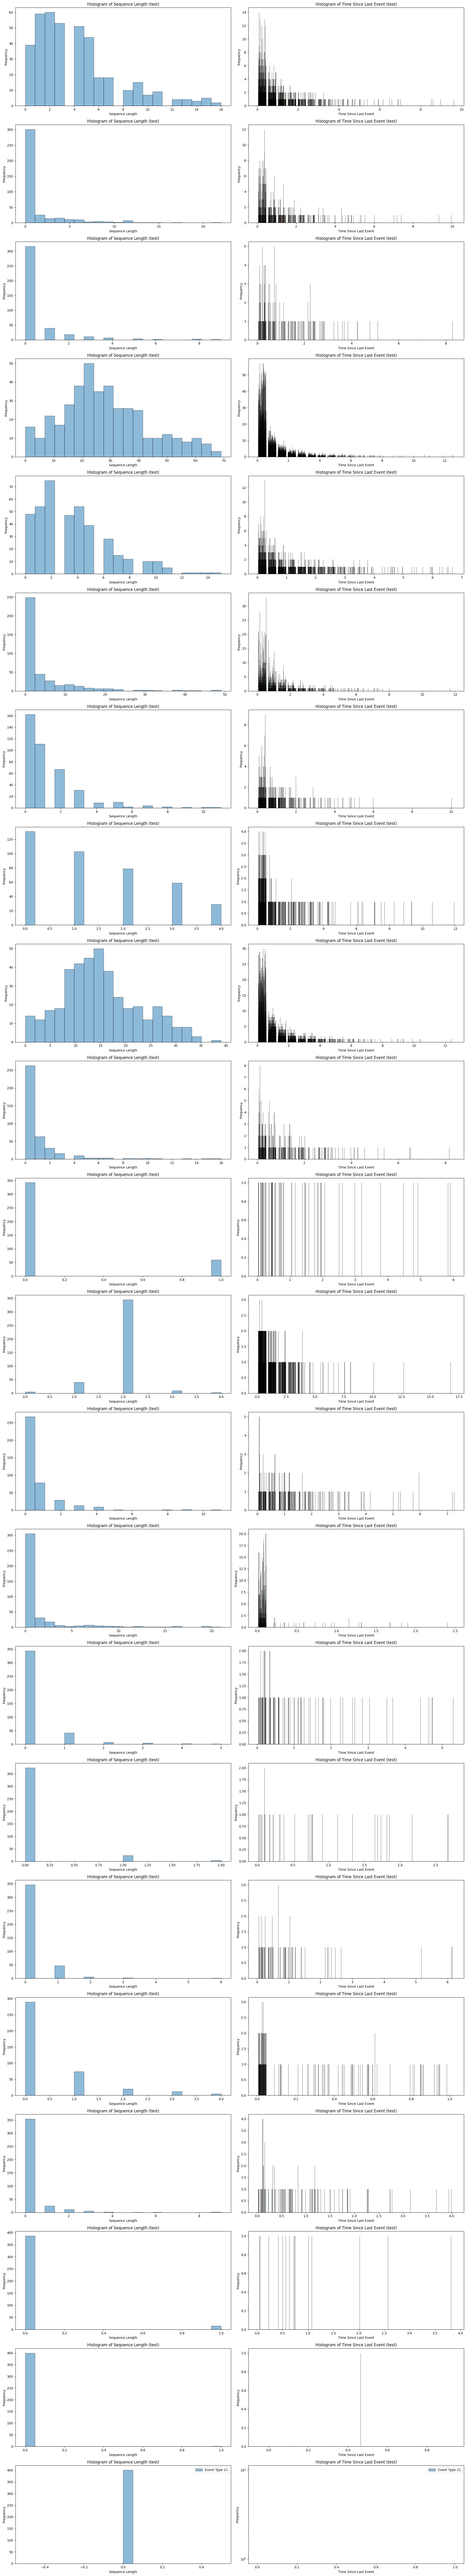

In [36]:
plot_stats_per_event_type(stackoverflow_data, splits=["test"])